<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Intro</a></span></li><li><span><a href="#Flocks" data-toc-modified-id="Flocks-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Flocks</a></span></li></ul></div>

# Intro
Exploratory notebook related to Reactive Agents and Multiagents Systems. Includes toy implementations and visualization of the major introductory concepts for the topic. Content is strongly based and driven by [Kadenze Online Course](https://www.kadenze.com/courses/generative-art-and-computational-creativity-i).

A **software (or digital) agent** is a computer program that acts autonomously (or semi-autonomously), and executes actions based on external and internal inputs.

**Deliberative (or cognitive) agents** maintain an internal state which influence their behavior.

**Reactive agents** don't maintain an internal state and act on external inputs in a reflexive manner, based on predefined behavioral sets.

In [9]:
# Basic libraries import
import time
import numpy as np
import pdb
import sys
import os
from pathlib import Path
import seaborn as sns
from collections import namedtuple

# Project specific libraries
from scipy.spatial import distance
from PIL import Image, ImageDraw

# Plotting
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation

sns.set_style("dark")
sns.set_context("paper")

%matplotlib notebook

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Flocks
[“Flocks, Herds, and Schools: A Distributed Behavioral Model” - Craig Reynolds 1987 SIGGRAPH paper](https://team.inria.fr/imagine/files/2014/10/flocks-hers-and-schools.pdf). Here he referred to simulated flocks as *boids*.

Is about the behavior/movements simulation for a group of entities/units. Ideally there is no leader, and the flock behavior emerges from three simple rules:
* **Cohesion** unit tendency to the average position of its neighbors
* **Alignment** unit tendency to align itself with the average heading of its neighbors
* **Separation** unit avoidance of collisions with its neighbors

*Neighbors* are only those entities of the group that a unit can perceive. This are defined based on a unit visibility.

Initially we will treat units as particles, so there is no need to take care of the rotation aspect of a unit.

In [43]:
# import locally defined class
from Flock import Flock

In [14]:
def draw_flow(flock: Flock, draw, circle_radius:int=Flock.CIRCLE_RADIUS, 
              visibility_radius=Flock.VISIBILITY_RADIUS):
    for unit in flock.units:
        x, y = unit.pos
        x_v, y_v = unit.vel
        # draw entity
        draw.ellipse([x-circle_radius, y-circle_radius, x+circle_radius, y+circle_radius], 
                     fill='black', outline='black')
        # draw visibility
        draw.ellipse([x-visibility_radius, y-visibility_radius, 
                      x+visibility_radius, y+visibility_radius], 
                     outline='red')
        # draw direction
        draw.line([x, y, (x+x_v*30), (y+y_v*30)], fill='blue')
        # draw velocity
        #draw.line([x, y, x+x_v, y+y_v], fill='blue')

<IPython.core.display.Javascript object>


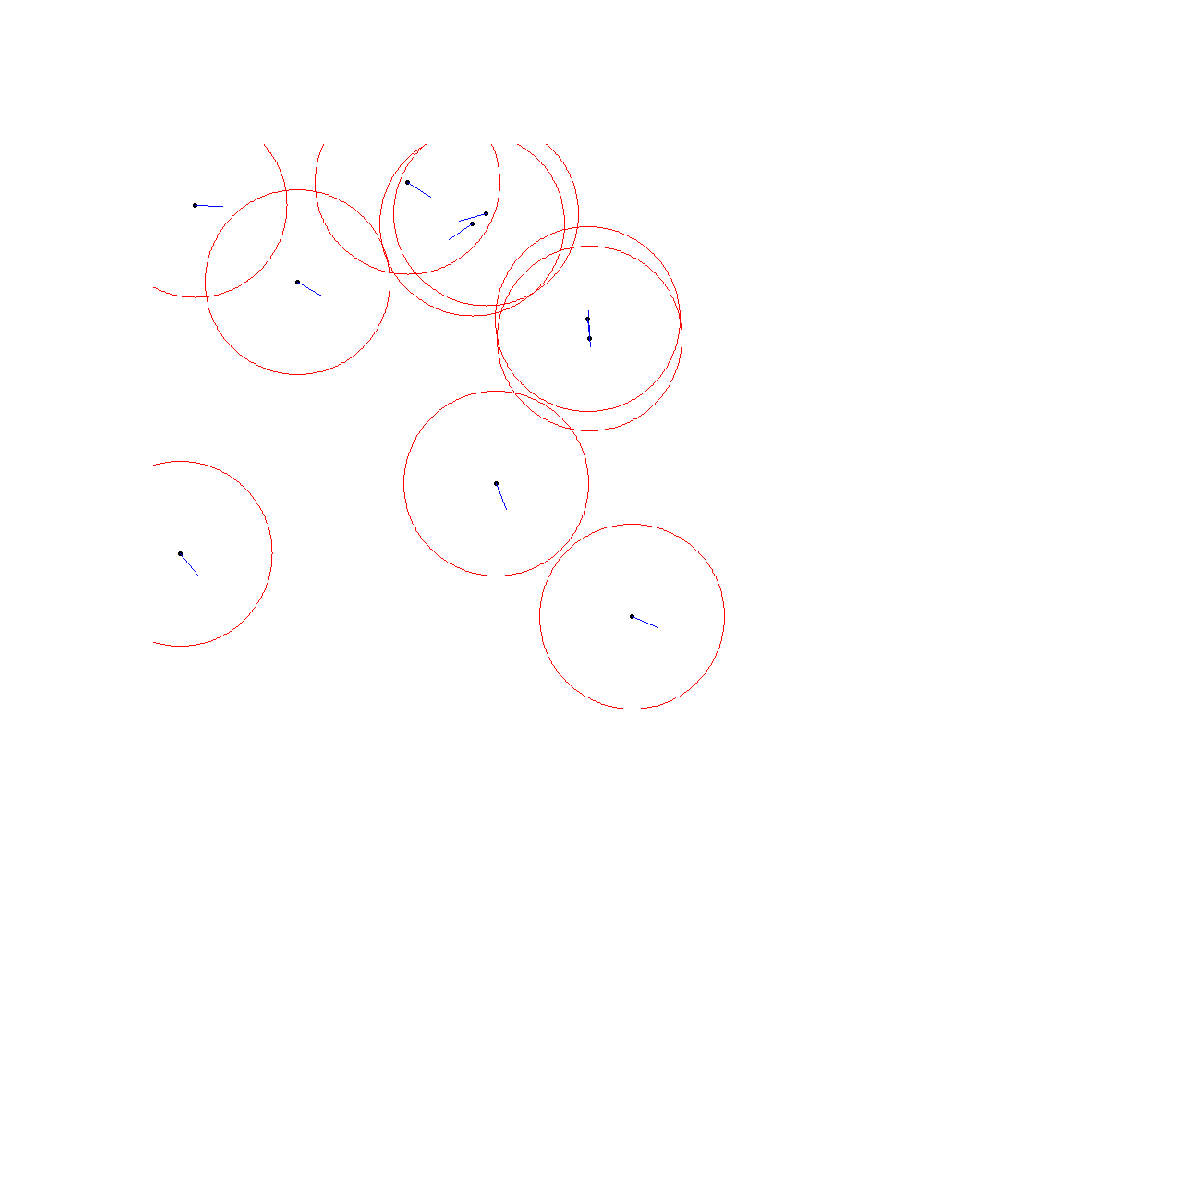

In [76]:
from Flock import Flock
img_size = 1000
flock = Flock(10, canvas_size=img_size/2)
img = Image.new('RGB', (img_size, img_size), (255, 255, 255))
fig, ax = plt.subplots(dpi=120, figsize=(5, 5))
im = ax.imshow(img)
plt.axis('off')

def animate(i, flock, img_size):
    img = Image.new('RGB', (img_size, img_size), (255, 255, 255))
    draw = ImageDraw.Draw(img)
    flock.update()
    draw_flow(flock, draw)
    im.set_data(img)

ani = animation.FuncAnimation(fig, animate, frames=500, interval=100, fargs=[flock, img_size])